In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

# Data science & Python & Machine Learning

### Тексты, файлы, сеть, форматы

### Домашнее задание

In [56]:
from collections import Counter

with open('r1984.txt', encoding='koi8-r') as file:
    counts = Counter(file.read().split())

dict(counts.most_common(10))

{'--': 2616,
 'в': 2071,
 'его': 542,
 'и': 2585,
 'как': 567,
 'на': 1157,
 'не': 1855,
 'он': 795,
 'с': 843,
 'что': 1099}

### Структура  notebook

- Импорты лучше помещать в самое начало
- Затем блок с константами и блок с функциями
- Разделяйте блоки загрузки данных и этапы их обработки

### Списки

In [57]:
lst = [1, 2, 3, 4]
lst[:2], lst[2:]

([1, 2], [3, 4])

### Кодировки

- С самого начала нужно было придумать как закодировать возможные символы: ASCII
- Один символ = один байт
- Всего 256 возможных символов

In [58]:
[chr(x) for x in range(60, 70)]

['<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E']

### Кодировки

- Можно использовать значения от 128 до 256: KOI8-R, Windows1251, ...
- Все равно не хватает, нжуна переменная длина кодирования: UTF-8

In [59]:
bytearray('привет', encoding='utf-8')

bytearray(b'\xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb5\xd1\x82')

### Определение кодировки

- В нормальных случаях кодировка описана в мета-данных
- Точно это сделать невозможно, но можно статистически:

In [60]:
import chardet
chardet.detect(open('r1984.txt', 'rb').read(10000))

{'confidence': 0.9757579693768483, 'encoding': 'KOI8-R', 'language': 'Russian'}

### Регулярные выражения

- Язык для манипуляций над строками
- Чаще всего используется для поиска чего-нибудь в тексте

In [61]:
import re

text = """Although many of the FBI's functions 
are unique, its activities in support of national
security are comparable to those of the British
MI5 and the Russian FSB"""

re.findall('[A-Z0-9]{3}', text)

['FBI', 'MI5', 'FSB']

Регулярные выражения могут стать сложными:

In [62]:
email = re.compile(r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:"""
                   r"""\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"""
                   r"""(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x2"""
                   r"""1\x23-\x5b\x5d-\x7f]|\\[\x01-\x09"""
                   r"""\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9]"""
                   r"""(?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9]"""
                   r"""(?:[a-z0-9-]*[a-z0-9])?|\[("""
                   r"""?:(?:25[0-5]|2[0-4][0-9]|[01]"""
                   r"""?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4]"""
                   r"""[0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*"""
                   r"""[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-"""
                   r"""\x1f\x21-\x5a\x53-\x7f]|\\[\x01-"""
                   r"""\x09\x0b\x0c\x0e-\x7f])+)\])""")
email.findall('lisitsyn.s.o@gmail.com')

['lisitsyn.s.o@gmail.com']

### Телефонные номера

Придумаем регулярное выражение для поиска номеров телефона:

In [63]:
phone = re.compile("\?\?\?")
phone.findall('+7(916)145-56-12')

[]

### Даты

In [64]:
from datetime import datetime

date = datetime.strptime('2018-03-31', '%Y-%m-%d')
datetime.strftime(date, '%Y/%d/%m')

'2018/31/03'

### Нечеткий поиск

In [65]:
import fuzzywuzzy.process

fuzzywuzzy.process.extractBests('Москва', ['Мск', 'Масква', 'Москва', 'Москоу', 'Воронеж'], limit=3)

[('Москва', 100), ('Масква', 83), ('Мск', 67)]

### Лемматизация

- Слова принимают различные формы
- Лучше всего использовать нормальную форму:

In [66]:
import pymorphy2
morpher = pymorphy2.MorphAnalyzer()
morpher.parse('московская')

[Parse(word='московская', tag=OpencorporaTag('ADJF femn,sing,nomn'), normal_form='московский', score=0.928571, methods_stack=((<DictionaryAnalyzer>, 'московская', 16, 7),)),
 Parse(word='московская', tag=OpencorporaTag('NOUN,anim,femn,Sgtm,Surn sing,nomn'), normal_form='московский', score=0.071428, methods_stack=((<DictionaryAnalyzer>, 'московская', 102, 6),))]

### Частоты слов

- Тексты бывают разной длины
- Правильно определять частоту относительно всех слов

In [67]:
total = sum(counts.values())
for k in counts:
    counts[k] /= total
counts.most_common(5)

[('--', 0.030020656414964424),
 ('и', 0.02966490704613266),
 ('в', 0.02376635299518017),
 ('не', 0.02128758319944916),
 ('на', 0.013277484507688777)]

### Относительные частоты

- Соотношение частот между разными документами говорит об их различиях
- Интереснее всего сравнивать с *корпусом языка*

In [69]:
corpus_counts = Counter()
for line in open('1grams-3.txt'):
    count, word = line.lower().split()
    corpus_counts[word] = int(count)
corpus_counts.most_common(5)

[('в', 652455), ('и', 586748), ('а', 579068), ('я', 499950), ('с', 163942)]

### TF-IDF

- Term Frequency: частота слова в документе
- Inverse Document Frequency: доля документов, имеющих это слово
- Произведение TF и IDF — хорошая мера интересности слова вообще

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

{'about': 0, 'all': 1, 'is': 2, 'knn': 3, 'ml': 4, 'svm': 5, 'xgboost': 6}

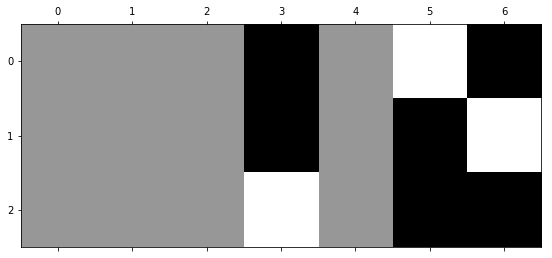

In [71]:
texts = [
    "ML is all about SVM",
    "ML is all about XGBoost",
    "ML is all about KNN"
]
plt.matshow(vectorizer.fit_transform(texts).todense(), cmap=plt.cm.gray)
vectorizer.vocabulary_

# Сеть

### HTTP

- Протокол, на котором работает интернет
- Для отладки и изучения очень удобно использовать утилиту `curl`

In [72]:
! curl -v google.com

* Rebuilt URL to: google.com/
*   Trying 2a00:1450:4010:c06::71...
* TCP_NODELAY set
* Connected to google.com (2a00:1450:4010:c06::71) port 80 (#0)
> GET / HTTP/1.1
> Host: google.com
> User-Agent: curl/7.58.0
> Accept: */*
> 
< HTTP/1.1 302 Found
< Cache-Control: private
< Content-Type: text/html; charset=UTF-8
< Referrer-Policy: no-referrer
< Location: http://www.google.ru/?gfe_rd=cr&dcr=0&ei=zGq_Wo7RG5-DuAGNmIngCA
< Content-Length: 268
< Date: Sat, 31 Mar 2018 11:02:36 GMT
< 
<HTML><HEAD><meta http-equiv="content-type" content="text/html;charset=utf-8">
<TITLE>302 Moved</TITLE></HEAD><BODY>
<H1>302 Moved</H1>
The document has moved
<A HREF="http://www.google.ru/?gfe_rd=cr&amp;dcr=0&amp;ei=zGq_Wo7RG5-DuAGNmIngCA">here</A>.
</BODY></HTML>
* Connection #0 to host google.com left intact


### requests

- Самая удобная библиотека для выполнения http запросов

In [73]:
import requests

response = requests.get('http://rbc.ru')
response.text[:100]

'<!DOCTYPE html>\n<!--[if lte IE 9]>\n<html class="no-js ie-old"> <![endif]-->\n<!--[if gt IE 9]><!-->\n<'

### Отправка email

Составим сообщение:

In [74]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

msg = MIMEMultipart()
msg['From'] = 'dts-pdsml@yandex.ru'
msg['To'] = 'lisitsyn.s.o@gmail.com'
msg['Subject'] = "Hello"
msg.attach(MIMEText("Hello this is me", 'plain'))

### Отправка email

Отправим сообщение:

In [75]:
import smtplib

server = smtplib.SMTP('smtp.yandex.ru', 587)
server.starttls()
server.login("dts-pdsml", "8fk-EFw-DdG-Cqa")
server.sendmail(
    from_addr='dts-pdsml@yandex.ru',
    to_addrs=['lisitsyn.s.o@gmail.com'],
    msg=msg.as_string(),
)
server.quit();

# Форматы

### HTML

- Язык разметки всех веб-сайтов
- Разберем полученный ответ:

In [76]:
import bs4

document = bs4.BeautifulSoup(response.text, 'html5lib')
document.find('title')

<title>РБК — новости, акции, курсы валют, доллар, евро</title>

### RSS (Rich Site Summary)

- Стандартный формат для распространения новостей и блогов

In [77]:
import feedparser

news = feedparser.parse('http://feeds.bbci.co.uk/news/politics/rss.xml')
[each.title for each in news['entries']][:5]

['Met Police chief: Social media leads children to violence',
 "Alan Sugar urged to 'delete' Corbyn Hitler tweet",
 'Gender pay gap deadline: What to know',
 'Spy poisoning: Russia escalates spy row with new expulsions',
 'Esther McVey: Saturday jobs help teenagers prepare for work']

### JSON

- JavaScript Object Notation
- Основной формат для передачи данных между бэкендом и фронтэндом

In [78]:
import json

json.dumps(dict(counts.most_common(10)), ensure_ascii=False)

'{"--": 0.030020656414964424, "и": 0.02966490704613266, "в": 0.02376635299518017, "не": 0.02128758319944916, "на": 0.013277484507688777, "что": 0.012611888914390636, "с": 0.009674087675005738, "он": 0.00912324994262107, "как": 0.006506770713793895, "его": 0.006219876061510214}'

### XML

- eXtensible Markup Language
- HTML — подмножество XML

In [79]:
from xml.etree import ElementTree as ET
root = ET.Element('words')
for word, count in counts.most_common(10):
    sub = ET.SubElement(root, 'word')
    sub.set('count', str(count))
    sub.text = word
ET.tostring(root, encoding='utf-8').decode('utf-8')

'<words><word count="0.030020656414964424">--</word><word count="0.02966490704613266">и</word><word count="0.02376635299518017">в</word><word count="0.02128758319944916">не</word><word count="0.013277484507688777">на</word><word count="0.012611888914390636">что</word><word count="0.009674087675005738">с</word><word count="0.00912324994262107">он</word><word count="0.006506770713793895">как</word><word count="0.006219876061510214">его</word></words>'

### CSV

- Comma (!) separated values
- Основной формат данных в Kaggle
- Прочитаем [график отключения уличного освещения](https://data.mos.ru/opendata/7701236617-grafik-vklyucheniya-i-vyklyucheniya-osveshcheniya) в .csv:

In [80]:
import pandas as pd

pd.read_csv('data-27881-2017-12-30.csv', delimiter=';').head()

,Date,OnTime,OffTime,DurationOfLighting,global_id,Unnamed: 5
0,01.01.2017,16:17,08:36,16:19,638836209,NaN
1,02.01.2017,16:19,08:36,16:17,638836210,NaN
2,03.01.2017,16:21,08:35,16:14,638836211,NaN
3,04.01.2017,16:23,08:34,16:11,638836213,NaN
4,05.01.2017,16:25,08:34,16:09,638836221,NaN


### Excel

- Данные по-прежнему часто обрабатываются в Excel
- Прочитаем [список станций метро](https://data.mos.ru/classifier/7704786030-stantsii-moskovskogo-metropolitena) в формате .xlsx

In [81]:
import pandas as pd

pd.read_excel('data-6467-2017-12-24.xlsx').head()

,Наименование станции,Наименование линии,Административный округ,global_id,Район,Статус,Код
0,Третьяковская,Калининская линия,Центральный административный округ,58701962,район Замоскворечье,действует,136
1,Медведково,Калужско-Рижская линия,Северо-Восточный административный округ,58701963,район Северное Медведково,действует,86
2,Первомайская,Арбатско-Покровская линия,Восточный административный округ,58701964,район Измайлово,действует,41
3,Калужская,Калужско-Рижская линия,Юго-Западный административный округ,58701965,Обручевский район,действует,104
4,Каховская,Третий Пересадочный контур,Юго-Западный административный округ,58701966,район Зюзино,строится,251
